# Plotting - Statistical Significance

The main library for plotting is **matplotlib**, which uses the Matlab plotting capabilities. 

We can also use the **seaborn** library on top of that to do visually nicer plots

In [1]:
import pandas as pd
import pandas_datareader.data as web # For accessing web data
from datetime import datetime #For handling dates
import os

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl

import seaborn as sns #A more fancy plotting library

#For presenting plots inline
%matplotlib inline 

In [2]:
os.environ["IEX_API_KEY"] = "pk_4f1eb9a770e04d2ebc44123e297618bb"#"pk_******************************"

In [3]:
stocks = 'FB'
data_source = 'iex'
start = datetime(2018,1,1)
end = datetime(2018,12,31)

stocks_data = web.DataReader(stocks, data_source, start, end)

#If you want to load only some of the attributes:
#stocks_data = web.DataReader(stocks, data_source, start, end)[['open','close']]

In [5]:
df = stocks_data
df = df.rename(columns = {'volume':'vol'})

In [6]:
df['profit'] = (df.close - df.open)
for idx, row in df.iterrows():
    if row.close < row.open:
        df.loc[idx,'gain']='negative'
    elif (row.close - row.open) < 1:
        df.loc[idx,'gain']='small_gain'
    elif (row.close - row.open) < 3:
        df.loc[idx,'gain']='medium_gain'
    else:
        df.loc[idx,'gain']='large_gain'
df.head()

open    high     low   close       vol  profit         gain
date                                                                     
2018-01-02  177.68  181.58  177.55  181.42  18151903    3.74   large_gain
2018-01-03  181.88  184.78  181.33  184.67  16886563    2.79  medium_gain
2018-01-04  184.90  186.21  184.10  184.33  13880896   -0.57     negative
2018-01-05  185.59  186.90  184.93  186.85  13574535    1.26  medium_gain
2018-01-08  187.20  188.90  186.33  188.28  17994726    1.08  medium_gain

In [9]:
gain_groups = df.groupby('gain')
gdf= df[['open','low','high','close','vol','gain']].groupby('gain').mean()
gdf = gdf.reset_index()

### Simple plots

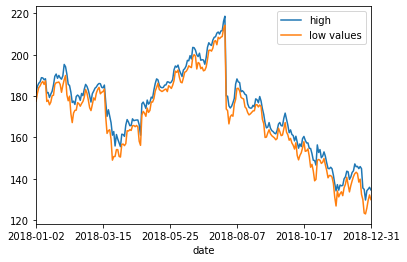

In [10]:
df.high.plot()
df.low.plot(label='low values')
plt.legend(loc='best') #puts the ledgent in the best possible position

### Histograms

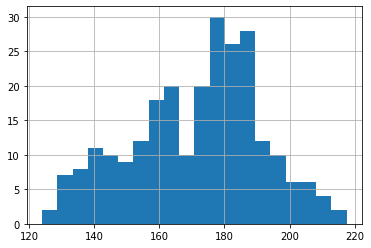

In [11]:
df.close.hist(bins=20)

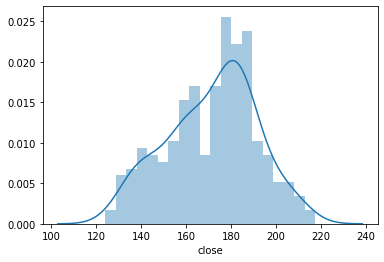

In [12]:
sns.distplot(df.close,bins=20)

### Plotting columns against each other

In [13]:
dff = pd.read_excel('example-functions.xlsx')
dfs = dff.sort_values(by='A', ascending = True) #Sorting in data frames

Plot columns B,C,D against A 

The plt.figure() command creates a new figure for each plot

<Figure size 432x288 with 0 Axes>

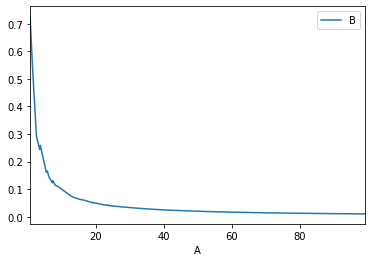

<Figure size 432x288 with 0 Axes>

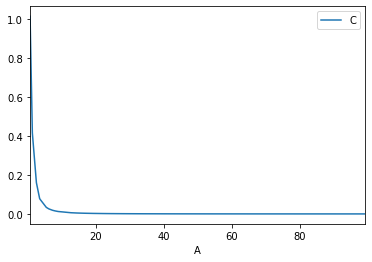

<Figure size 432x288 with 0 Axes>

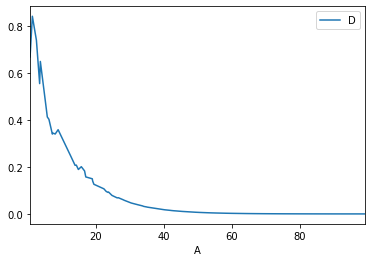

In [15]:
plt.figure(); 
dfs.plot(x = 'A', y = 'B');
plt.figure(); 
dfs.plot(x = 'A', y = 'C');
plt.figure(); 
dfs.plot(x = 'A', y = 'D');

Use a grid to put all the plots together

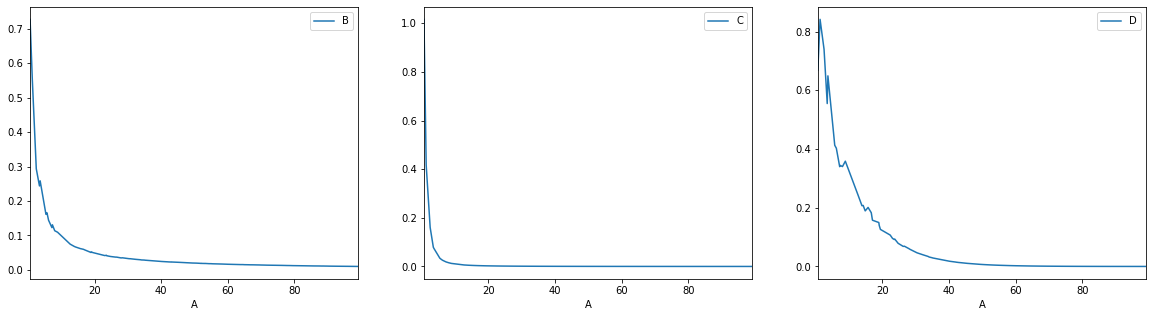

In [16]:
#plt.figure(); 
fig, ax = plt.subplots(1, 3,figsize=(20,5))
dfs.plot(x = 'A', y = 'B',ax = ax[0]);
dfs.plot(x = 'A', y = 'C',ax = ax[1]);
dfs.plot(x = 'A', y = 'D',ax = ax[2]);

Plot all colums together against A.

Clearly they are different functions

<Figure size 432x288 with 0 Axes>

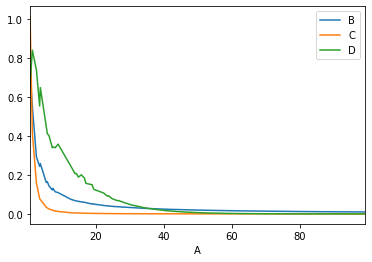

In [17]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D']);

Plot all columns against A in log scale

We observe straight lines for B,C while steeper drop for D

<Figure size 432x288 with 0 Axes>

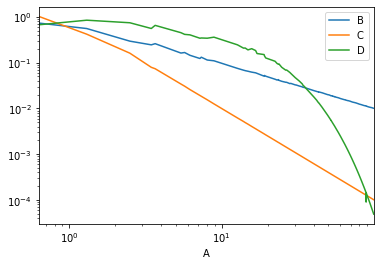

In [18]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D'], loglog=True);

Plot with log scale only on y-axis. 

The plot of D becomes a line, indicating that D is an exponential function of A

<Figure size 432x288 with 0 Axes>

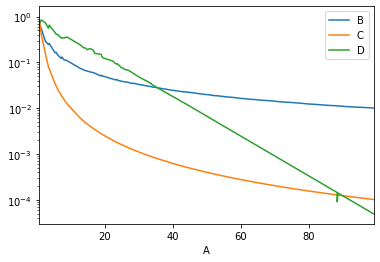

In [19]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D'], logy=True);

Plotting using matlab notation

Also how to put two figures in a 1x2 grid

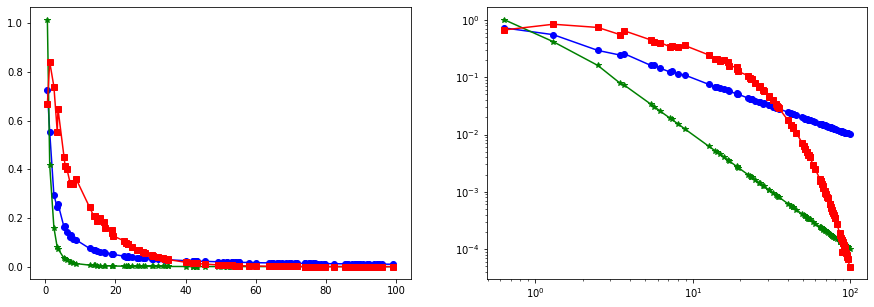

In [20]:
plt.figure(figsize = (15,5)) #defines the size of figure
plt.subplot(121) #plot with 1 row, 2 columns, 1st plot
plt.plot(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-',dfs['A'],dfs['D'],'rs-')
plt.subplot(122)  #plot with 1 row, 2 columns, 2nd plot
plt.loglog(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-',dfs['A'],dfs['D'],'rs-')

Using seaborn

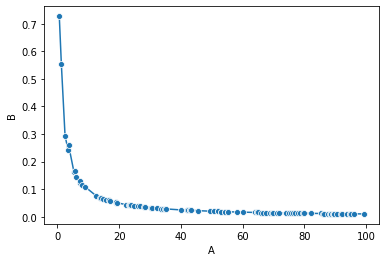

In [21]:
sns.lineplot(x= 'A', y='B',data = dfs,marker='o')

**Scatter plots**: Scatter plots take as imput two series X and Y and plot the points (x,y).

We will do the same plots as before as scatter plots using the dataframe functions

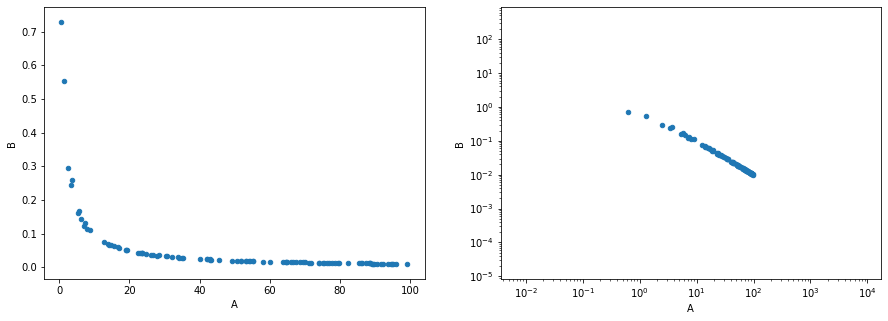

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
dff.plot(kind ='scatter', x='A', y='B', ax = ax[0])
dff.plot(kind ='scatter', x='A', y='B', loglog = True,ax = ax[1])

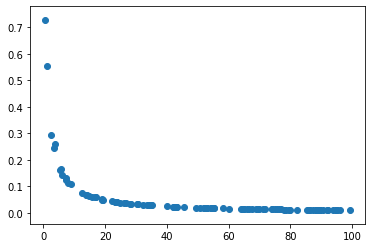

In [23]:
plt.scatter(dff.A, dff.B)

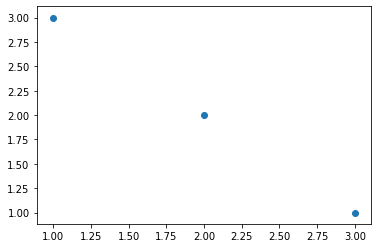

In [24]:
plt.scatter([1,2,3],[3,2,1])

Putting many scatter plots into the same plot

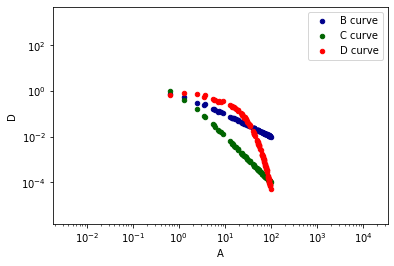

In [25]:
t = dff.plot(kind='scatter', x='A', y='B', color='DarkBlue', label='B curve', loglog=True);
dff.plot(kind='scatter', x='A', y='C',color='DarkGreen', label='C curve', ax=t, loglog = True);
dff.plot(kind='scatter', x='A', y='D',color='Red', label='D curve', ax=t, loglog = True);

Using seaborn

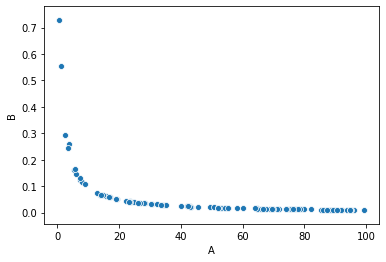

In [26]:
sns.scatterplot(x='A',y='B', data = dff)

In log-log scale (for some reason it seems to throw away small values)

[]

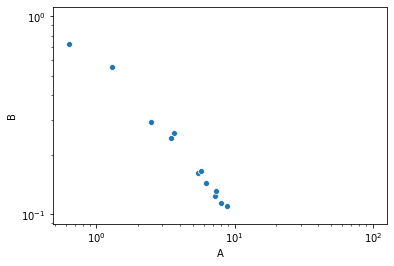

In [27]:
splot = sns.scatterplot(x='A',y='B', data = dff)
#splot.set(xscale="log", yscale="log")
splot.loglog()

### Statistical Significance ###

Recall the dataframe we obtained when grouping by gain

In [127]:
gdf

gain        open         low        high       close           vol
0   large_gain  170.459730  169.941351  175.660811  174.990811  3.034571e+07
1  medium_gain  172.305769  171.410962  175.321346  174.185577  2.795407e+07
2     negative  171.473306  168.024545  172.441322  169.233636  2.771124e+07
3   small_gain  171.218049  169.827317  173.070488  171.699268  2.488339e+07

AWe see that there are differences in the volume of trading depending on the gain. But are these differences statistically significant?  We can test that using the Student t-test. The Student t-test will give us a value for the differnece between the means in units of standard error, and a p-value that says how important this difference is. Usually we require the p-value to be less than 0.05 (or 0.01 if we want to be more strict). Note that for the test we will need to use all the values in the group.

To compute the t-test we will use the **SciPy** library, a Python library for scientific computing.

In [28]:
import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library

The t-test value is:

$$t = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} $$

where $\bar x_i$ is the mean value of the $i$ dataset, $\sigma_i^2$ is the variance, and $n_i$ is the size. 

In [29]:
#Test statistical significance of the difference in the mean volume numbers

sm = gain_groups.get_group('small_gain').vol
lg = gain_groups.get_group('large_gain').vol
med = gain_groups.get_group('medium_gain').vol
neg = gain_groups.get_group('negative').vol
print(stats.ttest_ind(sm,neg,equal_var = False))
print(stats.ttest_ind(sm,med, equal_var = False))
print(stats.ttest_ind(sm,lg, equal_var = False))
print(stats.ttest_ind(neg,med,equal_var = False))
print(stats.ttest_ind(neg,lg,equal_var = False))
print(stats.ttest_ind(med,lg, equal_var = False))

Ttest_indResult(statistic=-0.7956394985081949, pvalue=0.429417750163685)
Ttest_indResult(statistic=-0.6701399815165451, pvalue=0.5044832095805987)
Ttest_indResult(statistic=-1.2311419812548245, pvalue=0.22206628199791936)
Ttest_indResult(statistic=-0.06722743349643102, pvalue=0.9465813743143181)
Ttest_indResult(statistic=-0.7690284467674665, pvalue=0.44515731685000515)
Ttest_indResult(statistic=-0.5334654665318221, pvalue=0.5950877691078409)


We can compute the standard error of the mean using the <tt>stats.sem </tt> method of scipy, which can also be called from the data frame

In [30]:
print(sm.sem())
print(neg.sem())
print(stats.sem(med))
print(stats.sem(lg))

3207950.267667195
1530132.8120272094
3271861.2395884297
3064988.17806777


We can also visualize the mean and the standard error in a bar-plot, using the barplot function of seaborn. Note that we need to apply this to the original data. The averaging is done automatically.

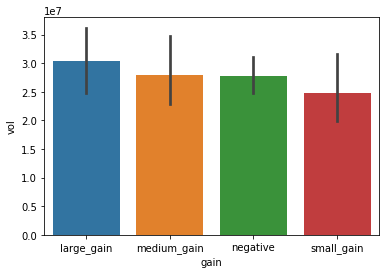

In [31]:
sns.barplot(x='gain',y='vol', data = df)

We can also visualize the distribution using a **box-plot**. In the box plot, the box shows the quartiles of the dataset (the part between the higher 25% and lower 25%), while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”. The line shows the median.

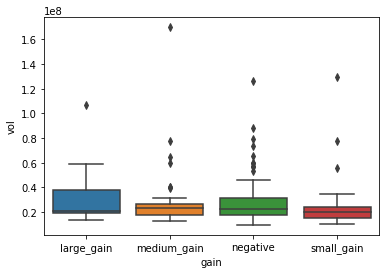

In [32]:
sns.boxplot(x='gain',y='vol', data = df)

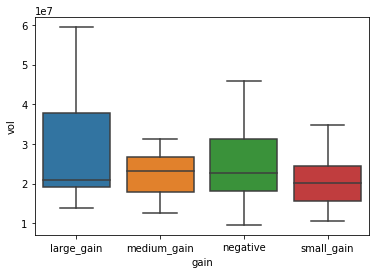

In [33]:
#Removing outliers
sns.boxplot(x='gain',y='vol', data = df, showfliers = False)

Plot the average volume over the different months

In [38]:
df = df.reset_index()
df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))

In [40]:
def get_month(row):
    return row.date.month

df['month'] = df.apply(get_month,axis = 1)

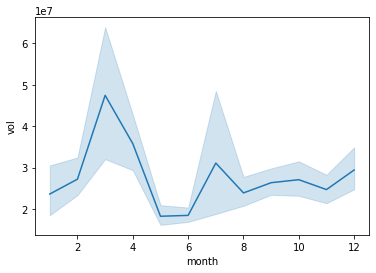

In [42]:
sns.lineplot(x='month', y = 'vol', data = df)

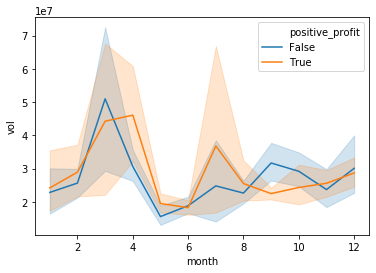

In [43]:
df['positive_profit'] = (df.profit>0)
sns.lineplot(x='month', y = 'vol', hue='positive_profit', data = df)

In [ ]:
df.drop('date',axis=1)

## Comparing multiple stocks

As a last task, we will use the experience we obtained so far -- and learn some new things -- in order to compare the performance of different stocks we obtained from Yahoo finance.

In [57]:
stocks = ['FB','GOOG','TSLA', 'MSFT','NFLX']
attr = 'close'
dfmany = web.DataReader(stocks, 
                    data_source,                               
                    start=datetime(2018, 1, 1), 
                    end=datetime(2018, 12, 31))[attr]
dfmany.head()

Symbols         FB     GOOG   TSLA   MSFT    NFLX
date                                             
2018-01-02  181.42  1065.00  64.11  85.95  201.07
2018-01-03  184.67  1082.48  63.45  86.35  205.05
2018-01-04  184.33  1086.40  62.92  87.11  205.63
2018-01-05  186.85  1102.23  63.32  88.19  209.99
2018-01-08  188.28  1106.94  67.28  88.28  212.05

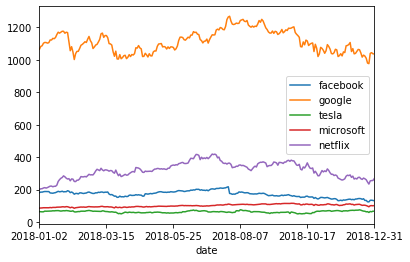

In [58]:
dfmany.FB.plot(label = 'facebook')
dfmany.GOOG.plot(label = 'google')
dfmany.TSLA.plot(label = 'tesla')
dfmany.MSFT.plot(label = 'microsoft')
dfmany.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

Next, we will calculate returns over a period of length $T$, defined as:

$$r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed with a simple DataFrame method **`pct_change()`**.  Note that for the first $T$ timesteps, this value is not defined (of course):

In [59]:
rets = dfmany.pct_change(30)
rets.iloc[25:35]

Symbols           FB      GOOG      TSLA      MSFT      NFLX
date                                                        
2018-02-07       NaN       NaN       NaN       NaN       NaN
2018-02-08       NaN       NaN       NaN       NaN       NaN
2018-02-09       NaN       NaN       NaN       NaN       NaN
2018-02-12       NaN       NaN       NaN       NaN       NaN
2018-02-13       NaN       NaN       NaN       NaN       NaN
2018-02-14 -0.010473  0.004413  0.005459  0.056545  0.322922
2018-02-15 -0.025505  0.006504  0.052955  0.073075  0.366837
2018-02-16 -0.037813  0.007732  0.066434  0.056136  0.354472
2018-02-20 -0.058014  0.000209  0.057328  0.051366  0.326492
2018-02-21 -0.055078  0.003975 -0.009215  0.036362  0.325348

Now we'll plot the timeseries of the returns of the different stocks.

Notice that the `NaN` values are gracefully dropped by the plotting function.

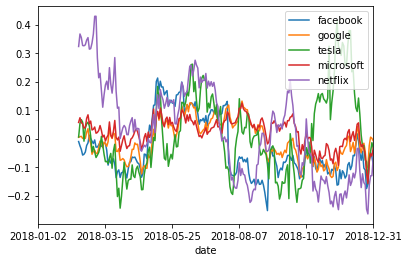

In [48]:
rets.FB.plot(label = 'facebook')
rets.GOOG.plot(label = 'google')
rets.TSLA.plot(label = 'tesla')
rets.MSFT.plot(label = 'microsoft')
rets.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

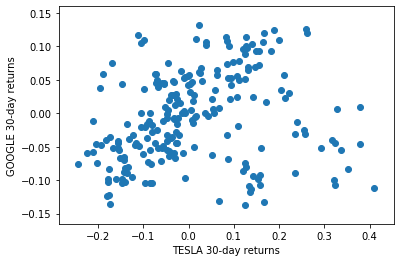

In [49]:
plt.scatter(rets.TSLA, rets.GOOG)
plt.xlabel('TESLA 30-day returns')
_ = plt.ylabel('GOOGLE 30-day returns')

We can also use the seaborn library for doing the scatterplot. Note that this method returns an object which we can use to set different parameters of the plot. In the example below we use it to set the x and y labels of the plot. Read online for more options.

In [51]:
data_source = 'iex'
start = datetime(2018,1,1)
end = datetime(2018,12,31)

dfb = web.DataReader('FB', data_source, start, end)
dgoog = web.DataReader('GOOG', data_source, start, end)

print(dfb.head())
print(dgoog.head())

              open    high     low   close    volume
date                                                
2018-01-02  177.68  181.58  177.55  181.42  18151903
2018-01-03  181.88  184.78  181.33  184.67  16886563
2018-01-04  184.90  186.21  184.10  184.33  13880896
2018-01-05  185.59  186.90  184.93  186.85  13574535
2018-01-08  187.20  188.90  186.33  188.28  17994726
               open     high      low    close   volume
date                                                   
2018-01-02  1048.34  1066.94  1045.23  1065.00  1237564
2018-01-03  1064.31  1086.29  1063.21  1082.48  1430170
2018-01-04  1088.00  1093.57  1084.00  1086.40  1004605
2018-01-05  1094.00  1104.25  1092.00  1102.23  1279123
2018-01-08  1102.23  1111.27  1101.62  1106.94  1047603


In [55]:
def gainrow(row):
    if row.close < row.open:
        return 'negative'
    elif (row.close - row.open) < 1:
        return 'small_gain'
    elif (row.close - row.open) < 3:
        return 'medium_gain'
    else:
        return 'large_gain'
    
dfb['gain'] = dfb.apply(gainrow, axis = 1)
dgoog['gain'] = dgoog.apply(gainrow, axis = 1)
dfb['profit'] = dfb.close-dfb.open
dgoog['profit'] = dgoog.close-dgoog.open

Text(0, 0.5, 'GOOG profit')

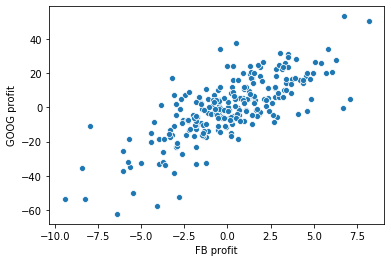

In [56]:
#Also using seaborn
fig = sns.scatterplot(dfb.profit, dgoog.profit)
fig.set_xlabel('FB profit')
fig.set_ylabel('GOOG profit')

Get all pairwise correlations in a single plot

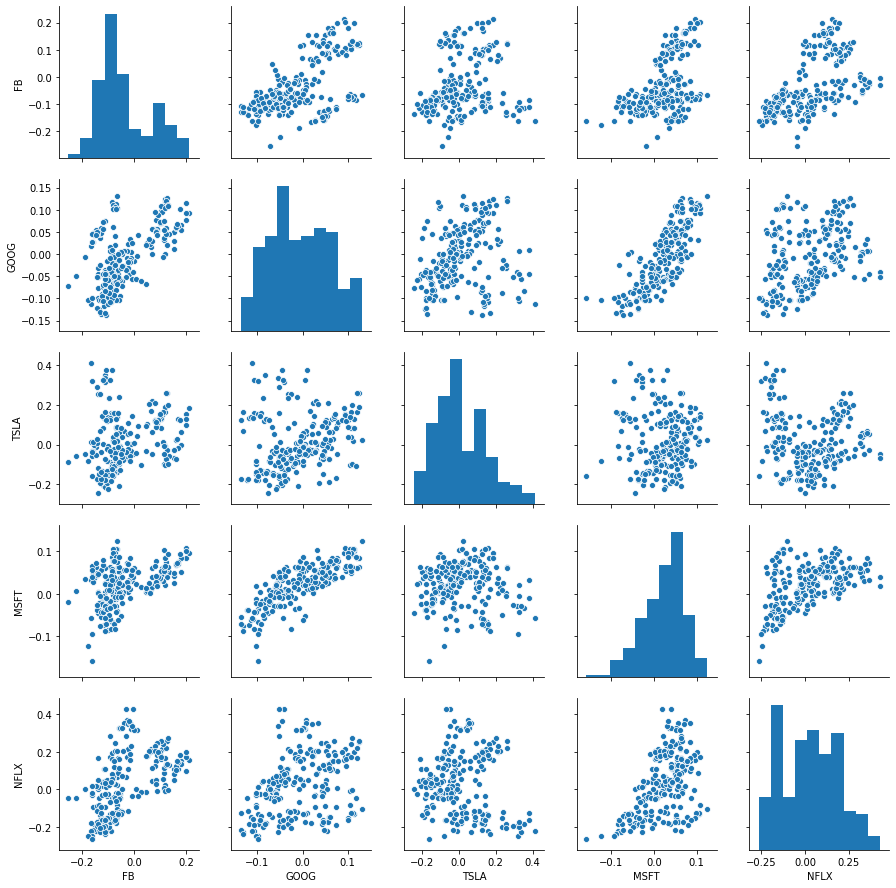

In [164]:
sns.pairplot(rets.iloc[30:])

There appears to be some (fairly strong) correlation between the movement of TSLA and YELP stocks.  Let's measure this.

The correlation coefficient between variables $X$ and $Y$ is defined as follows:

$$\text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y}$$

Pandas provides a DataFrame method to compute the correlation coefficient of all pairs of columns: **`corr()`**.

In [165]:
rets.corr()

Symbols        FB      GOOG      TSLA      MSFT      NFLX
Symbols                                                  
FB       1.000000  0.598776  0.226645  0.470696  0.546997
GOOG     0.598776  1.000000  0.210414  0.790085  0.348008
TSLA     0.226645  0.210414  1.000000 -0.041969 -0.120794
MSFT     0.470696  0.790085 -0.041969  1.000000  0.489569
NFLX     0.546997  0.348008 -0.120794  0.489569  1.000000

In [167]:
rets.corr(method='spearman')

Symbols        FB      GOOG      TSLA      MSFT      NFLX
Symbols                                                  
FB       1.000000  0.540949  0.271626  0.457852  0.641344
GOOG     0.540949  1.000000  0.288171  0.803731  0.382466
TSLA     0.271626  0.288171  1.000000  0.042268 -0.066012
MSFT     0.457852  0.803731  0.042268  1.000000  0.456912
NFLX     0.641344  0.382466 -0.066012  0.456912  1.000000

It takes a bit of time to examine that table and draw conclusions.  

To speed that process up it helps to visualize the table using a heatmap.

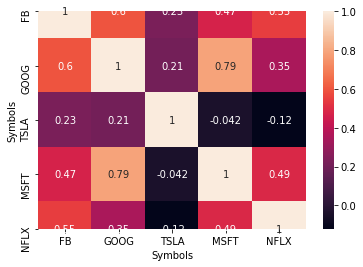

In [168]:
_ = sns.heatmap(rets.corr(), annot=True)

Use the scipy.stats library to obtain the p-values for the pearson and spearman rank correlations

In [169]:
print(stats.pearsonr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.spearmanr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.pearsonr(rets.iloc[30:].GOOG, rets.iloc[30:].FB))
print(stats.spearmanr(rets.iloc[30:].GOOG, rets.iloc[30:].FB))

(-0.12079364118016642, 0.07311519342514292)
SpearmanrResult(correlation=-0.06601220718867777, pvalue=0.3286469530126206)
(0.5987760976044885, 6.856639483414064e-23)
SpearmanrResult(correlation=0.5409485585956174, pvalue=3.388893335195231e-18)


In [170]:
print(stats.pearsonr(dfb.profit, dgoog.profit))
print(stats.spearmanr(dfb.profit, dgoog.profit))

(0.7502980828890071, 1.1838784594493575e-46)
SpearmanrResult(correlation=0.7189927028730208, pvalue=3.177135649196623e-41)


Finally, it is important to know that the plotting performed by Pandas is just a layer on top of `matplotlib` (i.e., the `plt` package).  

So Panda's plots can (and should) be replaced or improved by using additional functions from `matplotlib`.

For example, suppose we want to know both the returns as well as the standard deviation of the returns of a stock (i.e., its risk).  

Here is visualization of the result of such an analysis, and we construct the plot using only functions from `matplotlib`.

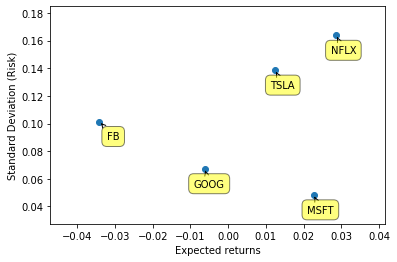

In [171]:
_ = plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

To understand what these functions are doing, (especially the `annotate` function), you will need to consult the online documentation for matplotlib.  Just use Google to find it.